In [ ]:
!pip install tabulate sklearn 

# Naive Bayes Classifier

This notebook will introduce you to the basics of the Naive Bayes Algorithm for classification tasks. It includes the following content:

- A brief overview of the Naive Bayes (NB) Classifier
- An example exercise of performing inference with NB


## What is a classifier?

A classifier is a machine learning model that is used to discriminate different objects based on specific features. Given sample data $X$, a classifier predicts the class $y$ it belongs to.

## What is a Naive Bayes Classifier?

A Naive Bayes classifier is a probabilistic machine learning model for solving classification tasks. It is based on Bayes theorem and imposes a strong assumption on feature independence.

## Bayes Theorem

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

We can compute the probability of event A happening, given the fact that event B has occurred. Event B is the evidence and event A is the hypothesis. The assumption made by Naive Bayes is that the features are independent, i.e. the presence of one feature does not affect the other. Therefore it is called naive.

Under the context of classification tasks, given the observation $X$, the classifier casts prediction on the class $y$. It can also be rewritten (with $y$ and $X$ replacing $A$ and $B$) as

$$ P(y \mid X) = \frac{P(X \mid y) \, P(y)}{P(X)} $$

The formula consists of four components:

- $
P(y \mid X) :
\:$ The posterior probability, which is the probability of class $y$ given the observation $X$

- $
P(y) :
\:$ The Prior probability, which is the prior probability (initial belief) of class $y$

- $
P(X \mid y) :
\:$The Likelihood, which is the probability of observation $X$ given class $y$.

- $
P(X) :
\:$The Evidence, which is the probability of observation $X$.

In classification tasks, the variable $y$ is the class label. The variable X represents the parameters/features and it usually contains multiple features/dimensions:

$$ X = (x_1, x_2, x_3, ..., x_n) $$

where $x_1, x_2, ..., x_n$ are the features and they are assumed to be independent in NB, i.e. $ (\:x_i \: \bot \:  x_j \mid y)\:\: \text{for all features}$ ($i \neq j$ and $i, j \in \{1, 2, ...., n\}$). By expanding using the chain rule we obtained the following:

$$ P(y \mid x_1, x_2, ..., x_n) = \frac{P(x_1, x_2, ..., x_n \mid y) \, P(y)}{P(X)} = \frac{P(x_1 \mid y) P(x_2 \mid y) P(x_3 \mid y) \cdots P(x_n \mid y) \, P(y)}{P(x_1) P(x_2) P(x_3) \cdots P(x_n)} $$

The denominator ($P(X)$) of the Bayes rule remains the same for all classes. Therefore, we can exclude it when performing inference since it is just a term for normalization. Therefore, based on the assumption of feature independence and ignoring the denominator the NB formula can be written as follows:

$$ P(\: y \mid x_1,x_2,...,x_n)\: \propto P(y) \prod_{i=1}^{i=n} P(\:x_i\mid y) $$

In (binary) classification tasks, the class variable $y$ has two outcomes. We need to find the class $y$ with maximum probability, i.e. $ y = argmax_y P(y) \prod_{i=1}^{i=n} P(\:x_i\mid y) $.

## An example exercise of performing inference with NB

We will use the following example to strengthen our understanding of NB. The example toy dataset is for classifying whether a person owns a pet. Observations $X$ contain three features, two categorical ("Gender" and "Education") and one numerical ("Income"), and class label $y$ (i.e. "Has_pet") corresponds to whether this person owns a pet.

In [1]:
from IPython.display import HTML, display
import tabulate
tab_cat = [["Gender", "Education", "Income", "Has_pet"],
          ["Female", "University", 103000,   "Yes"],
          ["Female", "HighSchool", 90500,   "No"],
          ["Female", "HighSchool", 114000,   "No"],
          ["Male",   "University", 102000,   "No"],
          ["Male",   "University", 75000,   "Yes"],
          ["Male",   "HighSchool", 90000,   "No"],
          ["Male",   "HighSchool", 85000,   "Yes"],
          ["Male",   "University", 86000,   "No"]]
display(HTML(tabulate.tabulate(tab_cat, tablefmt='html')))



Gender,Education,Income,Has_pet
Female,University,103000,Yes
Female,HighSchool,90500,No
Female,HighSchool,114000,No
Male,University,102000,No
Male,University,75000,Yes
Male,HighSchool,90000,No
Male,HighSchool,85000,Yes
Male,University,86000,No


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2a - Compute the Likelihood table of having pet, for each categorical feature, as well as the marginal probability.

- $P(Gender|Has\_pet)$: $P(Male|Yes)$, $P(Female|Yes)$, $P(Male|No)$, $P(Female|No)$
    
- $P(Education|Has\_pet)$: $P(University|Yes)$, $P(HighSchool|Yes)$, $P(University|No)$, $P(HighSchool|No)$
    
</div>

In [5]:
tab_likelihood_gender = [
    ["likelihood","-",  "Has_pet", "-", "-"],
    ["-",          "-",  "Yes", "No", "P(Gender)"],
    ["Gender", "Male", "2/3", "3/5", "5/8"], 
    ["-", "Female",    "1/3", "2/5", "3/8"],
    ["-", "P(Has_pet)","3/8", "5/8", ""]
]
display(HTML(tabulate.tabulate(tab_likelihood_gender, tablefmt='html')))


tab_likelihood_gender = [
    ["likelihood","-",  "Has_pet", "-", "-"],
    ["-",          "-",  "Yes", "No", "P(Education)"],
    ["Education", "University", "2/3", "2/5", "4/8"], 
    ["-", "HighSchool", "1/3", "3/5", "4/8"],
    ["-", "P(Has_pet)", "3/8", "5/8", ""]
]
display(HTML(tabulate.tabulate(tab_likelihood_gender, tablefmt='html')))

likelihood,-,Has_pet,-,-
-,-,Yes,No,P(Gender)
Gender,Male,2/3,3/5,5/8
-,Female,1/3,2/5,3/8
-,P(Has_pet),3/8,5/8,


likelihood,-,Has_pet,-,-
-,-,Yes,No,P(Education)
Education,University,2/3,2/5,4/8
-,HighSchool,1/3,3/5,4/8
-,P(Has_pet),3/8,5/8,


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2b - Compute the posterior probability

- $P(\text{No}|\text{Male})$, $P(\text{Yes}|\text{Female})$
    
- $P(\text{Yes}|\text{Univeristy})$, $P(\text{No}|\text{HighSchool})$

</div>


<div class='alert'>

$P(\text{No}|\text{Male})$, $P(\text{Yes}|\text{Female})$ = $3/5$, $1/3$
    
$P(\text{Yes}|\text{Univeristy})$, $P(\text{No}|\text{HighSchool})$ = $2/4$, $3/4$

</div>

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2c - Compute the Likelihood of having pets using mean, standard deviation, and normal distribution function:

- Mean: $ \mu = \frac{1}{n} \sum^{n}_{i=1}{x_i} $
    
- Standard Deviation $ \sigma = \left[ \frac{1}{n-1} \sum^{n}_{i=1}{(x_i-\mu)^2} \right]^\frac{1}{2}  $
    
- Normal Distribution $f(x)=\dfrac{1}{\sigma\sqrt{2\pi}}\,e^{-\dfrac{(x-\mu)^2}{2\sigma{}^2}}$
    
Compute $L( \text{Income}=90000 \mid \text{Yes})$, $L( \text{Income}=90000 \mid \text{No})$

</div>

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def yesno(x):
    print(x)
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    
def norm_dist(x, mean, std):
    pdf = 1/(std*np.sqrt(2*np.pi))*np.exp(-((x-mean)**2)/((2*std)**2))
    return pdf

def income_mean(income):
    return sum(income)/len(income)

def income_stdev(income, mean):
    sum_ = 0
    for i in income:
        sum_ += (i-mean)**2
    std = np.sqrt(1/(len(income)-1)*sum_)
    return std


df = pd.DataFrame(tab_cat, columns=['Gender', 'Education', 'Income', 'Has_pet']).drop(0)
display(df)

income_yes = [row[1]['Income'] for row in df.iterrows() if row[1]['Has_pet'] == 'Yes']
income_no = [row[1]['Income'] for row in df.iterrows() if row[1]['Has_pet'] == 'No']

mean_income_yes = income_mean(income_yes)
print(mean_income_yes)
mean_income_no = income_mean(income_no)
print(mean_income_no)
                  
stdev_yes = income_stdev(income_yes, mean_income_yes)
print(stdev_yes)
stdev_no = income_stdev(income_no, mean_income_no)
print(stdev_no)

norm_dist_yes = norm_dist(90000, mean_income_yes, stdev_yes)
print('L(Income=90000|Yes) = ',norm_dist_yes)
norm_dist_no = norm_dist(90000, mean_income_no, stdev_no)
print('L(Income=90000|No) = ',norm_dist_no)


,Gender,Education,Income,Has_pet
1,Female,University,103000,Yes
2,Female,HighSchool,90500,No
3,Female,HighSchool,114000,No
4,Male,University,102000,No
5,Male,University,75000,Yes
6,Male,HighSchool,90000,No
7,Male,HighSchool,85000,Yes
8,Male,University,86000,No


87666.66666666667
96500.0
14189.197769195176
11456.4392373896
L(Income=90000|Yes) =  2.7926478962176378e-05
L(Income=90000|No) =  3.212994960213091e-05


<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2d - Making inference

- $X=(Education=University, Gender=Female, Income=100000)$
    
- $X=(Education=HighSchool, Gender=Male, Income=92000)$

</div>



(Education = University,Gender = Female,Income = 100000) = 5.599141791240688e-06
(Education = HighSchool,Gender = Male,Income = 92000) = 1.0041887695836335e-05
0.9211443587748009


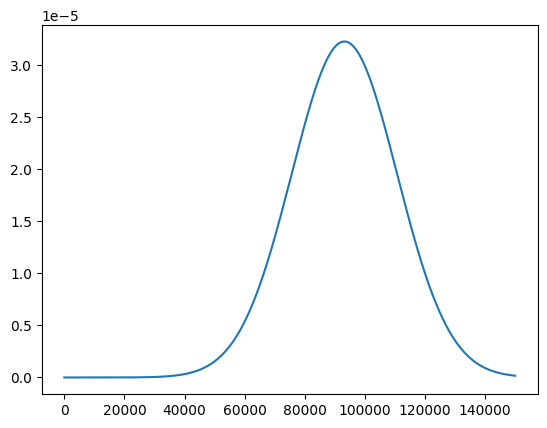

In [126]:

    
income = df['Income']

mean_1 = income_mean(income)
stDev_1 = income_stdev(income, mean_1)
norm_1 = norm_dist(100000, mean_1, stDev_1)

p1 = norm_1 * 4/8 * 3/8
print(f'(Education = University,Gender = Female,Income = 100000) = {p1}')


mean_2 = income_mean(income)
stDev_2 = income_stdev(income, mean_2)
norm_2 = norm_dist(92000, mean_2, stDev_2)

p2 = norm_2 * 4/8 * 5/8
print(f'(Education = HighSchool,Gender = Male,Income = 92000) = {p2}')

yy = [norm_dist(i, mean_1, stDev_1) for i in xx]
print(sum(yy[:100001]))

plt.plot(xx,yy)

<div class='alert alert-block alert-success' style="font-weight:bolder">

### Task 2e (Extra Credit) Implementing a Naive Bayes Classifier and performing classification on the Iris dataset. Note that the Iris dataset only contains numerical features.

</div>




In [71]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris["data"], iris["target"]
print("data", X)
print("class/label", y)

data [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3